## Observations and Insights 

In [1]:
%matplotlib notebook

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "../Resources/Mouse_metadata.csv"
study_results_path = "../Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data_combined = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
data_combined.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
total_mice = data_combined["Mouse ID"].count()
total_mice

1893

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Optional: Get all the data for the duplicate mouse ID. 
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
unduplicated_mice = data_combined.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
unduplicated_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Checking the number of mice in the clean DataFrame.
unduplicated_mice["Mouse ID"].nunique()

249

## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
#and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and standard error of the mean of the tumor volume.

mean_drug = unduplicated_mice.groupby("Drug Regimen").mean()['Tumor Volume (mm3)']
mean_drug

med_drug = unduplicated_mice.groupby("Drug Regimen").median()['Tumor Volume (mm3)']
med_drug

var_drug = unduplicated_mice.groupby("Drug Regimen").var()['Tumor Volume (mm3)']
var_drug

sd_drug = unduplicated_mice.groupby("Drug Regimen").std()['Tumor Volume (mm3)']
sd_drug

sem_drug = unduplicated_mice.groupby("Drug Regimen").sem()['Tumor Volume (mm3)']
sem_drug

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

tumor_drug = pd.DataFrame({"Mean": mean_drug,
                           "Median": med_drug,
                           "Variance": var_drug,
                           "Standard Deviation": sd_drug,
                           "Standard Error of Mean": sem_drug
                          })
tumor_drug

,Mean,Median,Variance,Standard Deviation,Standard Error of Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [7]:
# Using the aggregation method, produce the same summary statistics in a single line

tumor_drug = unduplicated_mice[['Drug Regimen', 'Tumor Volume (mm3)']].groupby('Drug Regimen').agg(['mean', 'median', 'var', 'std', 'sem'])
tumor_drug.rename(columns={"mean": "Mean", 
                          "median": "Median", 
                         "var": "Variance", 
                         "std": "Standard Diviation", 
                         "sem": "Standard Error of the Mean"})


Tumor Volume (mm3)                                           \
                           Mean     Median   Variance Standard Diviation   
Drug Regimen                                                               
Capomulin             40.675741  41.557809  24.947764           4.994774   
Ceftamin              52.591172  51.776157  39.290177           6.268188   
Infubinol             52.884795  51.820584  43.128684           6.567243   
Ketapril              55.235638  53.698743  68.553577           8.279709   
Naftisol              54.331565  52.509285  66.173479           8.134708   
Placebo               54.033581  52.288934  61.168083           7.821003   
Propriva              52.393463  50.909965  43.138803           6.568014   
Ramicane              40.216745  40.673236  23.486704           4.846308   
Stelasyn              54.233149  52.431737  59.450562           7.710419   
Zoniferol             53.236507  51.818479  48.533355           6.966589   

                                         
             Standard Error of the Mean  
Drug Regimen                             
Capomulin                      0.329346  
Ceftamin                       0.469821  
Infubinol                      0.492236  
Ketapril                       0.603860  
Naftisol                       0.596466  
Placebo                        0.581331  
Propriva                       0.525862  
Ramicane                       0.320955  
Stelasyn                       0.573111  
Zoniferol                      0.516398

## Bar and Pie Charts

<IPython.core.display.Javascript object>


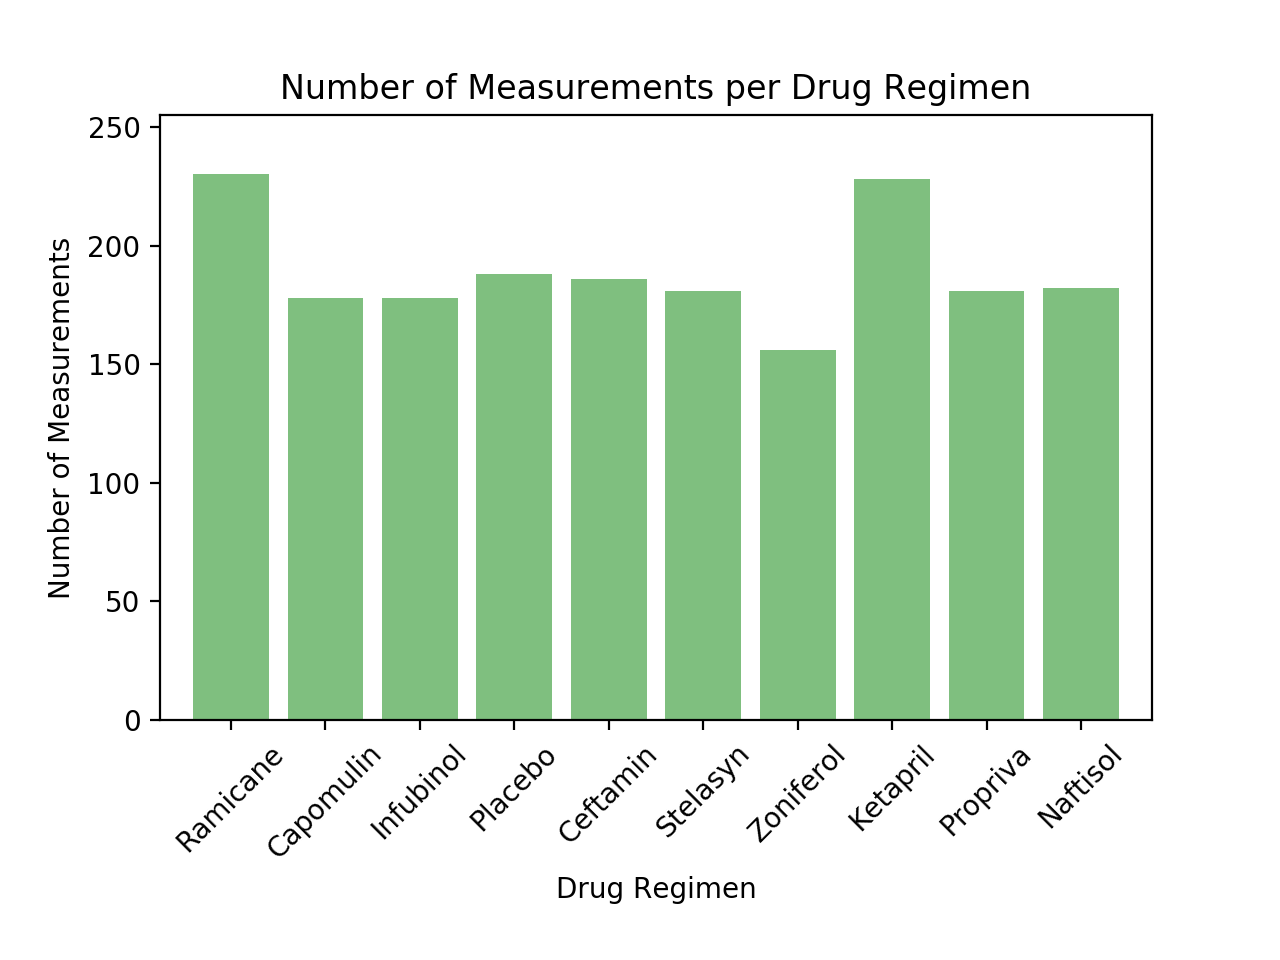

Text(0, 0.5, 'Number of Measurements')

In [45]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

# dr_labels = unduplicated_mice.groupby("Drug Regimen")
# count_dr_labels = dr_labels["Mouse ID"].count()
# count_dr_labels

#Create x and y axis
drug_count = [230, 178, 178, 188, 186, 181, 156, 228, 181, 182]
x_axis = np.arange(len(drug_count))

#Create bar chart
drug_count_chart1 = plt.bar(x_axis, drug_count, color='g', alpha=0.5, align="center")

# Create list for labels
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin','Stelasyn', 'Zoniferol', 
                            'Ketapril', 'Propriva', 'Naftisol'], rotation=45)
#Set Limits
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(drug_count)+25)

#Scale chart
plt.gcf().subplots_adjust(bottom=0.25)

#Chart Labels
plt.title("Number of Measurements per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measurements")


In [ ]:
# # Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

# drugs = unduplicated_mice.groupby("Drug Regimen")
# count_drugs = drugs['Drug Regimen'].count()
# drug_count_chart2 = count_drugs.plot(kind='bar')

# drug_count_chart2.set_xlabel("Drug Regimen")
# drug_count_chart2.set_ylabel("Number of Measurements")
# drug_count_chart2.set_title("Number of Measurements per Drug Regimen")

# drug_count_chart2

In [ ]:
# # Generate a pie plot showing the distribution of female versus male mice using pandas

# #create list for lables
# labels = ["Male", "Female"] 

# #Find number of males and females and create list
# # sex_of_mice = unduplicated_mice.groupby("Sex").count()
# # sex_of_mice.head()
# sizes = [958, 930]

# #Colors of each section 
# colors = ["lightskyblue", "lightcoral"]

# # Set explode distance
# explode = (0.1, 0,)

# mf_pie1 = plt.pie(sizes, labels=labels, colors=colors,
#         autopct="%1.1f%%", shadow=True, startangle=140)

# mf_pie1

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
